In [1]:
import xarray as xr
from pathlib import Path
import yaml
import datetime as dt
import matplotlib.pyplot as plt

# Get granule statistics

In [2]:
# Save directory on Sense group workspace
save_dir = "/gws/nopw/j04/sensecdt/users/flojo/data/"
# working folder
folder = "2023_test"
filepath = Path(save_dir+folder)

In [3]:
# concatenate all the lists of granules

all_scene_ids = {}

for satellite in ["aqua", "terra"]:
    subfolders = [filepath / str(m) / satellite for m in range(1,13)]

    for subfolder in subfolders:
        # Meta data folder
        meta_filepath = subfolder / "meta"
        # Load scene_ids
        with open(meta_filepath / "scene_ids.yaml", 'r') as file:
            scene_ids = yaml.safe_load(file)
        all_scene_ids.update(scene_ids)

len(all_scene_ids)

21275

##### Print some statistics

In [12]:
# Total granules
print(f"Total number of granules: {len(all_scene_ids)}")
print(f"\tAqua: {len([k for k in all_scene_ids.keys() if 'MYD' in k])}")
print(f"\tTerra: {len([k for k in all_scene_ids.keys() if 'MOD' in k])}")

# Daylight only
print(f"All daylight granules: {len([k for k in all_scene_ids.keys() 
                    if all_scene_ids[k]["day_night_flag"] == "DAY"])}")
print(f"\tAqua: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["day_night_flag"] == "DAY"
                    and 'MYD' in k])}")
print(f"\tTerra: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "DAY"
                     and 'MOD' in k])}")
# Both day and night
print(f"Granules with 'both' day/night flag: {len([k for k in all_scene_ids.keys() 
                    if all_scene_ids[k]["day_night_flag"] == "BOTH"])}")
print(f"\tAqua: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["day_night_flag"] == "BOTH"
                    and 'MYD' in k])}")
print(f"\tTerra: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "BOTH"
                     and 'MOD' in k])}")

# Useful granules
print(f"Useful granules (valid pixels >0): {len([k for k in all_scene_ids.keys() 
                               if all_scene_ids[k]["valid_pixel_fraction"] != 0.0])}")
print(f"\tAqua: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["valid_pixel_fraction"] != 0.0 and 'MYD' in k])}")
print(f"\tTerra: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["valid_pixel_fraction"] != 0.0 and 'MOD' in k])}")
print("Granules with valid fraction over:")
print(f"\t0.1: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["valid_pixel_fraction"] > 0.1])}")
print(f"\t0.25: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["valid_pixel_fraction"] > 0.25])}")
print(f"\t0.5: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["valid_pixel_fraction"] > 0.5])}")
print(f"\t0.75: {len([k for k in all_scene_ids.keys()
                if all_scene_ids[k]["valid_pixel_fraction"] > 0.75])}")

# Daylight granules
print(f"Useful, daylight granules: {len([k for k in all_scene_ids.keys() 
                    if all_scene_ids[k]["day_night_flag"] == "DAY"
                    and all_scene_ids[k]["valid_pixel_fraction"] != 0.0])}")
print(f"\tAqua: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["day_night_flag"] == "DAY"
                    and all_scene_ids[k]["valid_pixel_fraction"] != 0.0
                    and 'MYD' in k])}")
print(f"\tTerra: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "DAY"
                     and all_scene_ids[k]["valid_pixel_fraction"] != 0.0
                     and 'MOD' in k])}")
print(f"\tLabrador Sea: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "DAY"
                     and all_scene_ids[k]["valid_pixel_fraction"] != 0.0
                     and all_scene_ids[k]["regions"]["labrador_fraction"] != 0.0])}")
print(f"\tGIN Seas: {len([k for k in all_scene_ids.keys()
                        if all_scene_ids[k]["day_night_flag"] == "DAY"
                        and all_scene_ids[k]["valid_pixel_fraction"] != 0.0
                        and all_scene_ids[k]["regions"]["gin_fraction"] != 0.0])}")
print(f"\tBarents Sea: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "DAY"
                     and all_scene_ids[k]["valid_pixel_fraction"] != 0.0
                     and all_scene_ids[k]["regions"]["barents_fraction"] != 0.0])}")
print("Daylight granules with valid fraction over:")
print(f"\t0.1: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["day_night_flag"] == "DAY"
                    and all_scene_ids[k]["valid_pixel_fraction"] > 0.1])}")
print(f"\t0.25: {len([k for k in all_scene_ids.keys()
                    if all_scene_ids[k]["day_night_flag"] == "DAY"
                    and all_scene_ids[k]["valid_pixel_fraction"] > 0.25])}")
print(f"\t0.5: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "DAY"
                     and all_scene_ids[k]["valid_pixel_fraction"] > 0.5])}")
print(f"\t0.75: {len([k for k in all_scene_ids.keys()
                if all_scene_ids[k]["day_night_flag"] == "DAY"
                and all_scene_ids[k]["valid_pixel_fraction"] > 0.75])}")
print("Daylight granules with valid fraction over 0.25 in regions:")
print(f"\tLabrador Sea: {len([k for k in all_scene_ids.keys()
                     if all_scene_ids[k]["day_night_flag"] == "DAY"
                     and all_scene_ids[k]["regions"]["labrador_fraction"] > 0.25])}")
print(f"\tGIN Seas: {len([k for k in all_scene_ids.keys()
                        if all_scene_ids[k]["day_night_flag"] == "DAY"
                        and all_scene_ids[k]["regions"]["gin_fraction"] > 0.25])}")
print(f"\tBarents Sea: {len([k for k in all_scene_ids.keys()
                        if all_scene_ids[k]["day_night_flag"] == "DAY"
                        and all_scene_ids[k]["regions"]["barents_fraction"] > 0.25])}")



Total number of granules: 21275
	Aqua: 10634
	Terra: 10641
All daylight granules: 9405
	Aqua: 4620
	Terra: 4785
Granules with 'both' day/night flag: 4737
	Aqua: 2382
	Terra: 2355
Useful granules (valid pixels >0): 16856
	Aqua: 8444
	Terra: 8412
Granules with valid fraction over:
	0.1: 12134
	0.25: 8980
	0.5: 4443
	0.75: 1833
Useful, daylight granules: 7289
	Aqua: 3718
	Terra: 3571
	Labrador Sea: 3314
	GIN Seas: 3607
	Barents Sea: 3026
Daylight granules with valid fraction over:
	0.1: 5267
	0.25: 3934
	0.5: 2004
	0.75: 843
Daylight granules with valid fraction over 0.25 in regions:
	Labrador Sea: 1956
	GIN Seas: 1181
	Barents Sea: 750


In [4]:
# Plot how number of valid granules varies over the year

monthly_scene_ids = {key:{} for key in range(1,13)}
        

for month in range(1,13):
    for satellite in ["aqua", "terra"]:
        subfolder = filepath / str(month) / satellite 
        # Meta data folder
        meta_filepath = subfolder / "meta"
        # Load scene_ids
        with open(meta_filepath / "scene_ids.yaml", 'r') as file:
            scene_ids = yaml.safe_load(file)
        monthly_scene_ids[month].update(scene_ids)

Text(0, 0.5, 'Total granules')

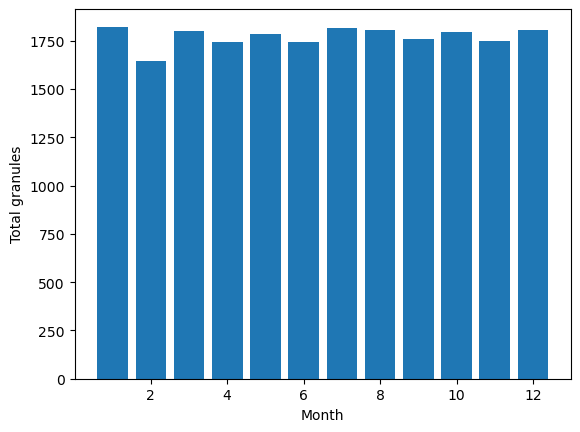

In [6]:
# bar plot
plt.bar(range(1,13), [len(monthly_scene_ids[m]) for m in range(1,13)])
plt.xlabel("Month")
plt.ylabel("Total granules")

Text(0, 0.5, 'Daylight granules')

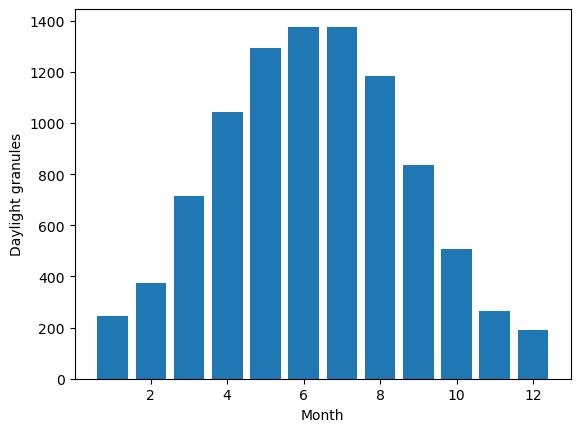

In [8]:
plt.bar(range(1,13), [len([k for k in monthly_scene_ids[m].keys()
                    if monthly_scene_ids[m][k]["day_night_flag"] == "DAY"])
                for m in range(1,13)])    
plt.xlabel("Month")
plt.ylabel("Daylight granules")


Text(0.5, 1.0, 'Daylight granules with valid fraction > 0.25')

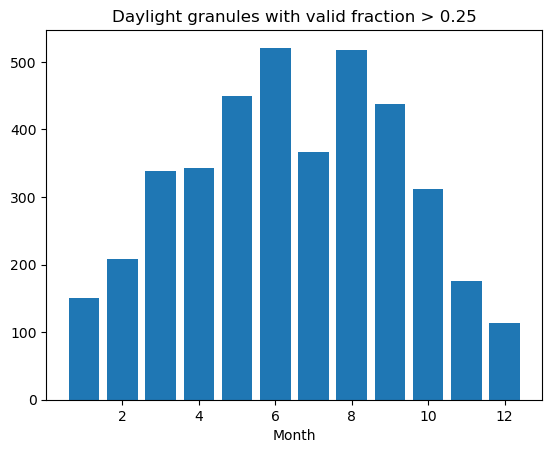

In [6]:
threshold = 0.25

plt.bar(range(1,13), [len([k for k in monthly_scene_ids[m].keys()
                    if monthly_scene_ids[m][k]["day_night_flag"] == "DAY"
                    and monthly_scene_ids[m][k]["valid_pixel_fraction"] > threshold])
                for m in range(1,13)])
plt.xlabel("Month")
plt.title(f"Daylight granules with valid fraction > {threshold}")


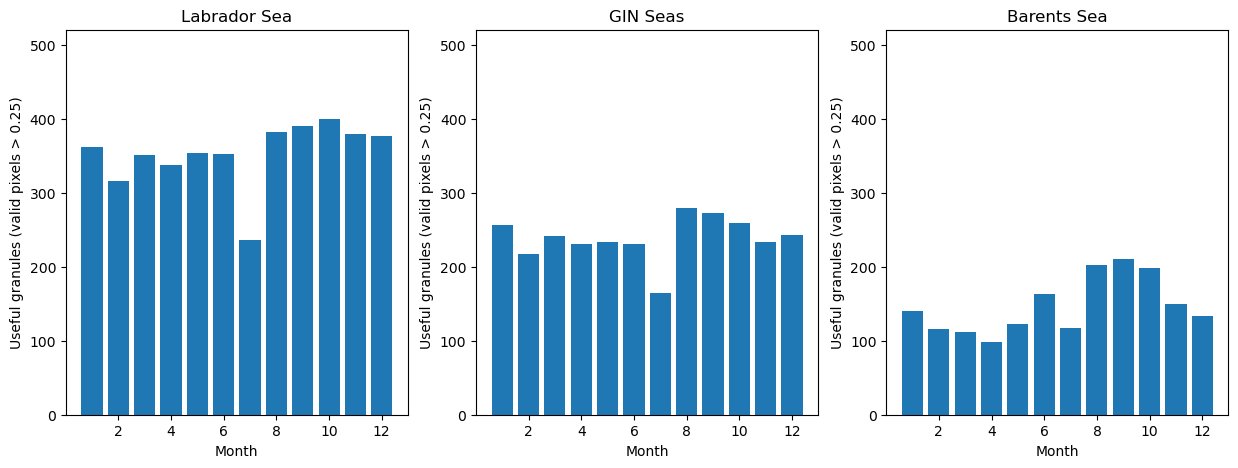

In [7]:


# same plot but for each region:
fig, axs = plt.subplots(1,3, figsize=(15,5))
regions = ["labrador_fraction", "gin_fraction", "barents_fraction"]
labels = ["Labrador Sea", "GIN Seas", "Barents Sea"]
for i, region in enumerate(regions):
    axs[i].bar(range(1,13), [len([k for k in monthly_scene_ids[m].keys()
                        if monthly_scene_ids[m][k]["regions"][region] > threshold])
                    for m in range(1,13)])
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel(f"Useful granules (valid pixels > {threshold})")
    axs[i].set_ylim(0, 520)
    axs[i].set_title(labels[i])

**NB Missing data on CEDA for both satellites in July 2023**

Text(0.5, 0.98, 'Useful granules (valid pixels > 0.25)')

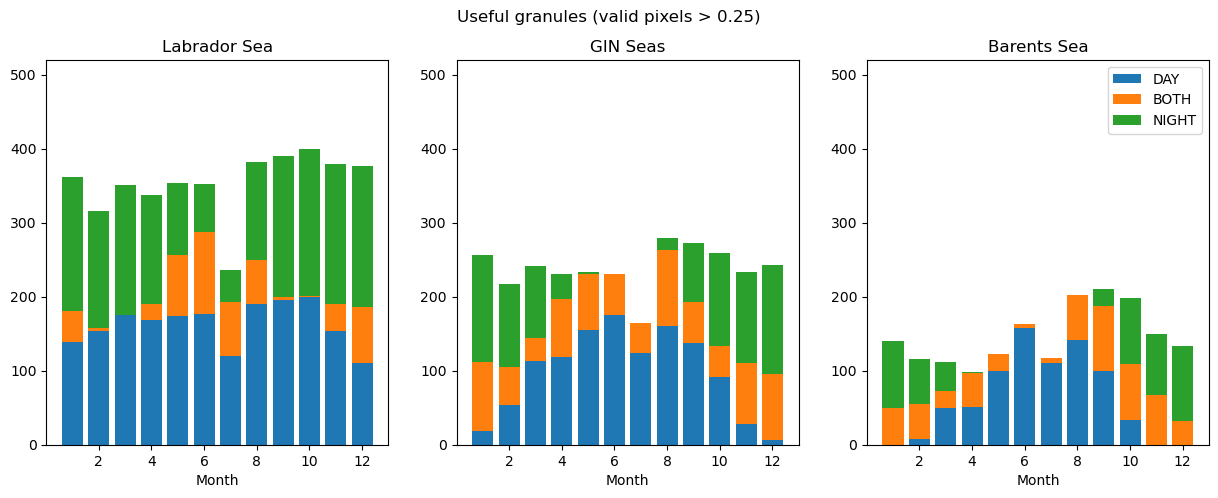

In [ ]:
# same plot but delineating between day and night:
fig, axs = plt.subplots(1,3, figsize=(15,5))
regions = ["labrador_fraction", "gin_fraction", "barents_fraction"]
labels = ["Labrador Sea", "GIN Seas", "Barents Sea"]
times = ["DAY", "BOTH", "NIGHT"]

for i, region in enumerate(regions):
    counts = [[len([k for k in monthly_scene_ids[m].keys()
                        if monthly_scene_ids[m][k]["day_night_flag"] == time
                        and monthly_scene_ids[m][k]["regions"][region] > threshold])
                    for m in range(1,13)] for time in times]
    
    bottom = [0]*12
    for time, count in zip(times, counts):
        axs[i].bar(range(1,13), count, label=time, bottom=bottom)
        bottom = [sum(x) for x in zip(bottom, count)]

    axs[i].set_xlabel("Month")
    axs[i].set_ylim(0, 520)
    axs[i].set_title(labels[i])
    
axs[2].legend()
fig.suptitle(f"Useful granules (valid pixels > {threshold})")

In [ ]:
# Normalise by area of region


In [ ]:
# Could compare these distributions with the number of days with CAO conditions.
# Also mean fraction of sea ice cover in each region.